In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import re
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("review_data.csv")
df.head(20)

,score,review,y
0,5.0,명불허전,1
1,5.0,"이거슨 한국의 까르보나라,,,🤍 들깨칼국수 고소하니 넘 맛나유 얼큰해물칼국수는 해물...",1
2,5.0,들깨가 찐하고 고소해요. 음식맛이 깔끔해요. 어르신 모시고 청주 온다면 식사하기 괜...,1
3,4.0,청주 사람들 점심엔 여기만 오나봐요. 주말 점심시간에 왔는데 손님 100명은 앉아있...,1
4,5.0,NaN,1
5,5.0,NaN,1
6,5.0,4명에서 3~4인 셋트시키면 진짜 배터지게 먹고나올수있어요!,1
7,5.0,들깨칼국수 땡기면 찾아가는곳,1
8,5.0,일하시는분들이 친절하고 음식이 들깨칼국수 맛있어요,1
9,3.0,NaN,0


In [3]:
def text_cleaning(text):
    # 정규표현식으로 한글만 추출
        hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
        result = hangul.sub('', text)
        return result

In [4]:
df = pd.read_csv("review_data.csv")
row = []
for i in df['review']:
    row.append(text_cleaning(str(i)))

df['ko_text'] = row
del df['review']

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출
df = df[df['ko_text'].str.len() > 0]
df.tail(5)

,score,y,ko_text
456,5.0,1,새우튀김 우동 처음 먹어봤는데 진짜 맛있어요충대 주변 돈까스집 다 먹어봤는데 양이나...
457,5.0,1,점심식사로 추천합니다 진짜 일식 돈까스중에서는최곱니다
458,5.0,1,충북대학교 맛집양꼬치 맛집이내요 몸에좋고 보양식이예요
459,5.0,1,맛있게 잘 먹었습니다
460,5.0,1,세트 먹었는데 푸짐하고 넘 맛있어요 명이서 먹을 양


In [5]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출합니다.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트합니다.
result = get_pos(df['ko_text'].values[0])
print(result)

['명불허전/Noun']


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())

In [7]:
X.shape

(358, 2871)

In [8]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'명불허전/Noun': 998, '이거슨/Noun': 1988, '한국/Noun': 2743, '의/Josa': 1980, '까르보나라/Noun': 353, '들깨/Noun': ..


In [26]:
print(df['ko_text'].values[1])
print(X[1])

이거슨 한국의 까르보나라 들깨칼국수 고소하니 넘 맛나유 얼큰해물칼국수는 해물도 많이 들어있고 약간 짬뽕 느낌 해물파전도 괜춘스 가족들과 외식하기 좋숩니다
  (0, 1927)	1
  (0, 2665)	1
  (0, 1922)	1
  (0, 343)	1
  (0, 686)	1
  (0, 2464)	2
  (0, 193)	1
  (0, 466)	1
  (0, 859)	1
  (0, 428)	1
  (0, 1707)	1
  (0, 1025)	1
  (0, 500)	1
  (0, 2700)	1
  (0, 612)	2
  (0, 850)	1
  (0, 701)	1
  (0, 1669)	1
  (0, 2320)	1
  (0, 499)	1
  (0, 2701)	1
  (0, 232)	1
  (0, 69)	1
  (0, 685)	1
  (0, 217)	1
  (0, 1858)	1
  (0, 2614)	1
  (0, 2202)	1
  (0, 511)	1


In [9]:
print(df['ko_text'].values[0])
print(X[0])

명불허전
  (0, 998)	1


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[0])

(358, 2871)
  (0, 998)	1.0


In [11]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)

(286, 2871)
(72, 2871)


In [12]:
import pickle
with open('맛집리뷰분석_충남대.model', 'rb') as f:
  loaded_model = pickle.load(f)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

accuracy: 0.74
Precision: 0.736
Recall: 1.000
F1: 0.848


AUC: 0.788


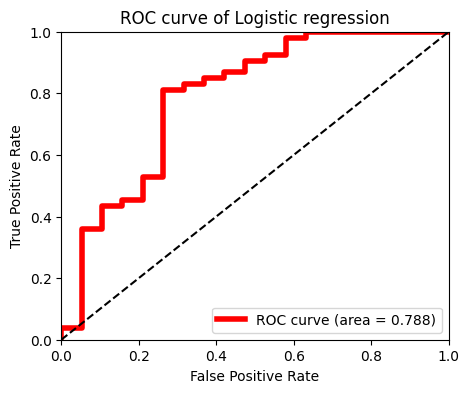

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

plt.rcParams['figure.figsize']=[5,4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

[(1.5780670779086743, 911), (0.976257462580082, 2273), (0.815134603204007, 2477), (0.61950926648821, 2245), (0.5851821711848181, 898)]
[(-0.6784009955085346, 1254), (-0.8503066138287007, 1973), (-0.8531965642716665, 278), (-0.8576986054419249, 1183), (-1.1429585702784573, 1985)]


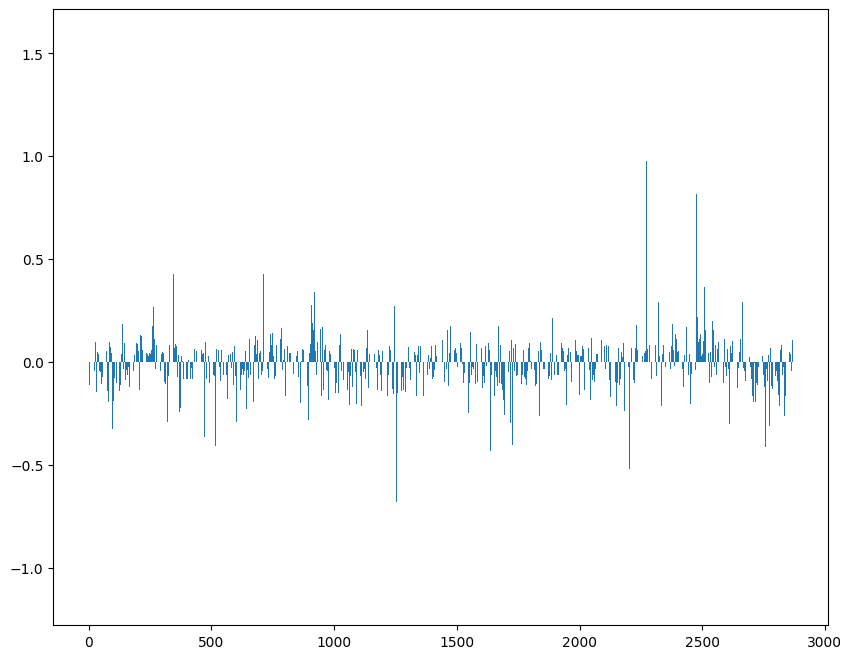

In [16]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
print(sorted(((value, index)for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index)for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

In [17]:
# 회귀모델의 계수를 기준으로 내림차순 정렬
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [18]:
# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력
invert_index_vectorizer = {v:k for k, v in index_vectorizer.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'..')

{998: '명불허전/Noun', 1988: '이거슨/Noun', 2743: '한국/Noun', 1980: '의/Josa', 353: '까르보나라/Noun', 712: '들깨/No..


In [19]:
# 계수가 높은 순으로 피처에 형태소 맵핑한 결과 출력, 이때 계수가 높은 피쳐는 리뷰에 긍정적인 영향을 주는 형태소라고 할 수 있다.
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])

맛있어요/Adjective 1.5780670779086743
좋아요/Adjective 0.976257462580082
최고/Noun 0.815134603204007
존맛/Noun 0.61950926648821
맛있게/Adjective 0.5851821711848181
먹었습니다/Verb 0.5720251484775519
대/Modifier 0.5590609975402624
칼국수/Noun 0.558994757425988
청주/Noun 0.5047784468122742
좋은/Adjective 0.5029195351589942


In [20]:
# 하위 10개 부정 형태소 출력
for coef in coef_pos_index[-10:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

손님/Noun -0.5775350788945912
임/Noun -0.579157327892668
요/Josa -0.5934781987405251
가/Josa -0.6052144663523074
말/Noun -0.6109133108832577
불친절/Noun -0.6784009955085346
은/Josa -0.8503066138287007
그냥/Noun -0.8531965642716665
별로/Noun -0.8576986054419249
이/Josa -1.1429585702784573
